In [1]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#  Identificación y descripción de variables
En el dataset podemos identificar los tipos de datos:
✅ Variable categórica: Gender (Género del empleado), EducationField (Área de estudios), MaritalStatus (Estado civil). Estas son categias que se puede ver la frecuencia.
✅ Variables Numéricas: Age (Edad del empleado), DailyRate (Tarifa diaria). Estas son medidbles, las podemos sumar, promediar etc.

In [4]:
url = '/content/drive/MyDrive/Colab Notebooks/prueba/WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(url, sep=',')

df.head() #Método para ver los 1° reguistros

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.info() #Se ve el tipo de dato de cada columan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Medidas de tendencia central y dispersión

Los sueldos son desigua, con sueldos muy altos.

Los empleados descontentos, tienden a renunciar.


In [18]:
# Seleccionar variables clave
columns_to_analyze = ["MonthlyIncome", "YearsAtCompany", "JobSatisfaction"]

# 📌 1. Medidas de tendencia central y dispersión
summary_stats = df[columns_to_analyze].describe()

# 📌 2. Identificar sesgo en la distribución (asimetría)
skewness = df[columns_to_analyze].skew()

# 📌 3. Calcular Rango Intercuartil (IQR)
Q1 = df[columns_to_analyze].quantile(0.25)
Q3 = df[columns_to_analyze].quantile(0.75)
IQR = Q3 - Q1

# 📌 Mostrar resultados
print("📊 Medidas de tendencia central y dispersión:\n", summary_stats)
print("\n📈 Asimetría de la distribución (Skewness):\n", skewness)
print("\n📏 Rango Intercuartil (IQR):\n", IQR)


📊 Medidas de tendencia central y dispersión:
        MonthlyIncome  YearsAtCompany  JobSatisfaction
count    1470.000000     1470.000000      1470.000000
mean     6502.931293        7.008163         2.728571
std      4707.956783        6.126525         1.102846
min      1009.000000        0.000000         1.000000
25%      2911.000000        3.000000         2.000000
50%      4919.000000        5.000000         3.000000
75%      8379.000000        9.000000         4.000000
max     19999.000000       40.000000         4.000000

📈 Asimetría de la distribución (Skewness):
 MonthlyIncome      1.369817
YearsAtCompany     1.764529
JobSatisfaction   -0.329672
dtype: float64

📏 Rango Intercuartil (IQR):
 MonthlyIncome      5468.0
YearsAtCompany        6.0
JobSatisfaction       2.0
dtype: float64


In [7]:
#Medidas de tendencia central (Medio)
promedio = df["Age"].mean()
print("Promedio: ", promedio)

mediana = df["Age"].median()
print("Mediana: ", mediana)

moda = df["Age"].mode()
print("Moda: ", moda)

Promedio:  36.923809523809524
Mediana:  36.0
Moda:  0    35
Name: Age, dtype: int64


In [9]:
#Resumen estadístico
df.Age.describe()
#El prinedio de edad es de 36 años y el máximo 60

,Age
count,1470.000000
mean,36.923810
std,9.135373
min,18.000000
25%,30.000000
50%,36.000000
75%,43.000000
max,60.000000


In [10]:
df["Age"].std() #Que tan alejados entan lo años respecto a los 36 años

9.135373489136734

In [12]:
IQR_Age = df["Age"].quantile(0.75) - df["Age"].quantile(0.25)
print(IQR_Age)


13.0


# Análisis de distribución
Pocos viejitos con salarios altos, la mayoria gana menos de la media y tiene pocos años en la empresa.

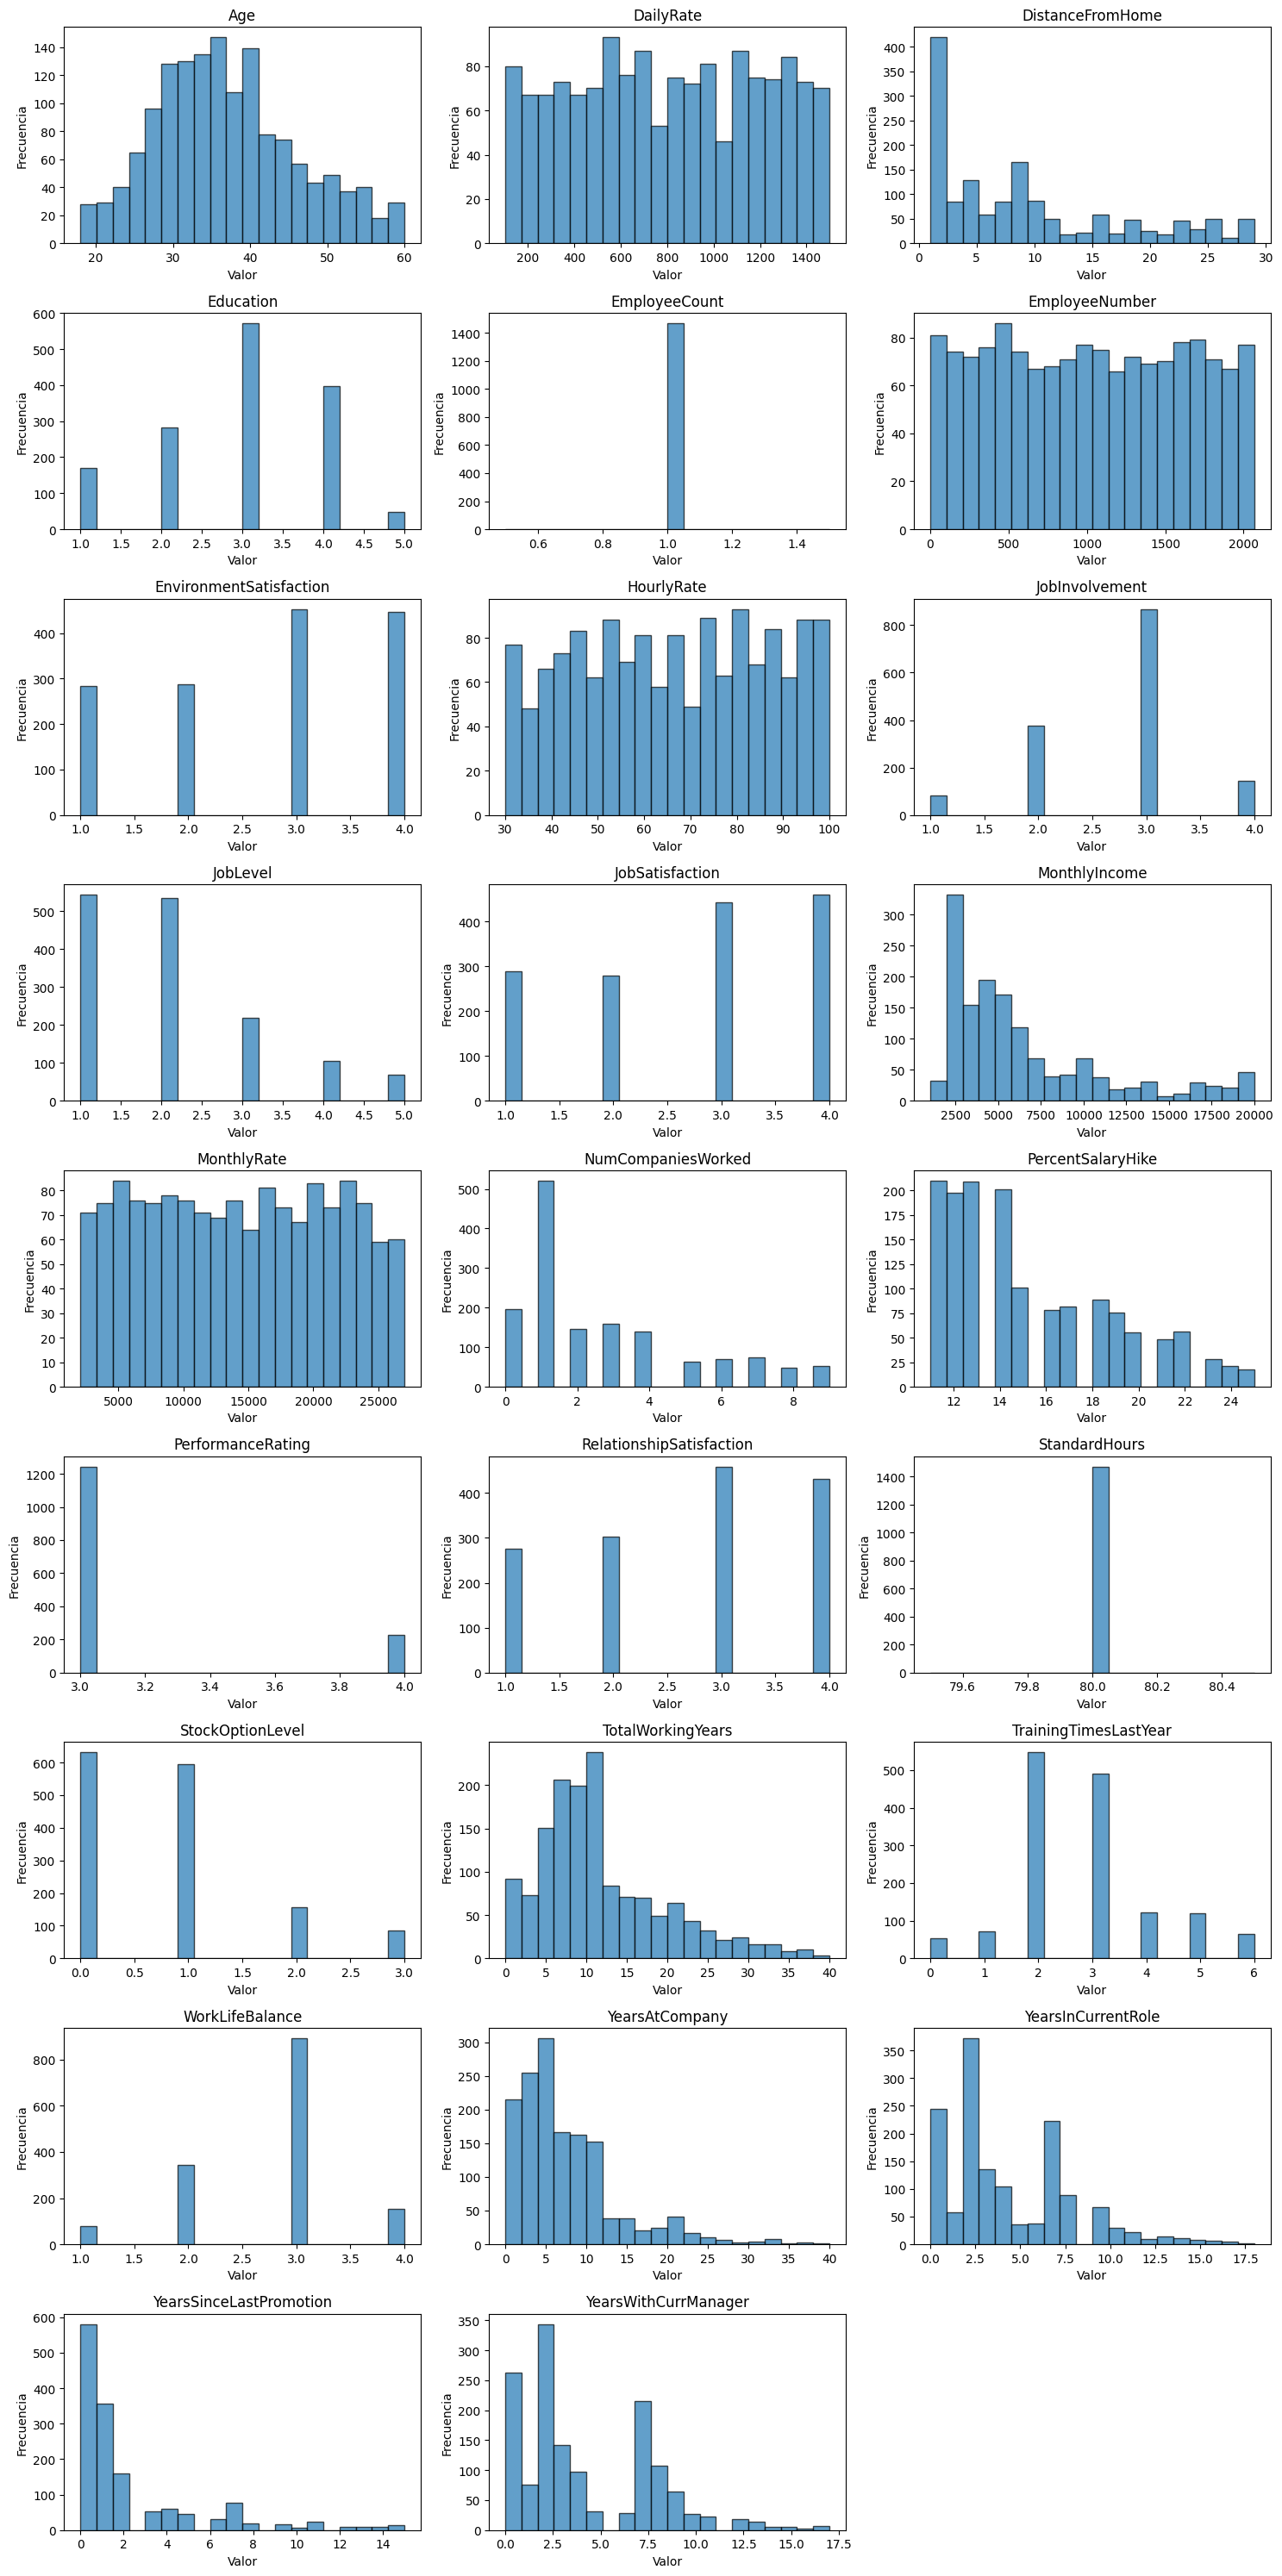

In [13]:
# Identificar columnas numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Graficar histogramas para todas las variables numéricas
num_cols = len(numerical_columns)
plt.figure(figsize=(15, 30))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_cols // 3 + 1, 3, i)  # Organizar en filas y columnas
    plt.hist(df[col], bins=20, alpha=0.7, edgecolor='black')
    plt.title(col)
    plt.xlabel("Valor")
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


In [14]:
""" Algunas variables como YearsSinceLastPromotion y PerformanceRating tienen muchos valores extremos, lo que indica que hay empleados que llevan mucho tiempo sin promoción o tienen rendimientos excepcionales. """

# Identificar columnas numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calcular asimetría y curtosis
asimetria = df[numerical_columns].skew()
curtosis = df[numerical_columns].kurt()

# Mostrar resultados
print("Asimetría:\n", asimetria)
print("\nCurtosis:\n", curtosis)


Asimetría:
 Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

Curtosis:


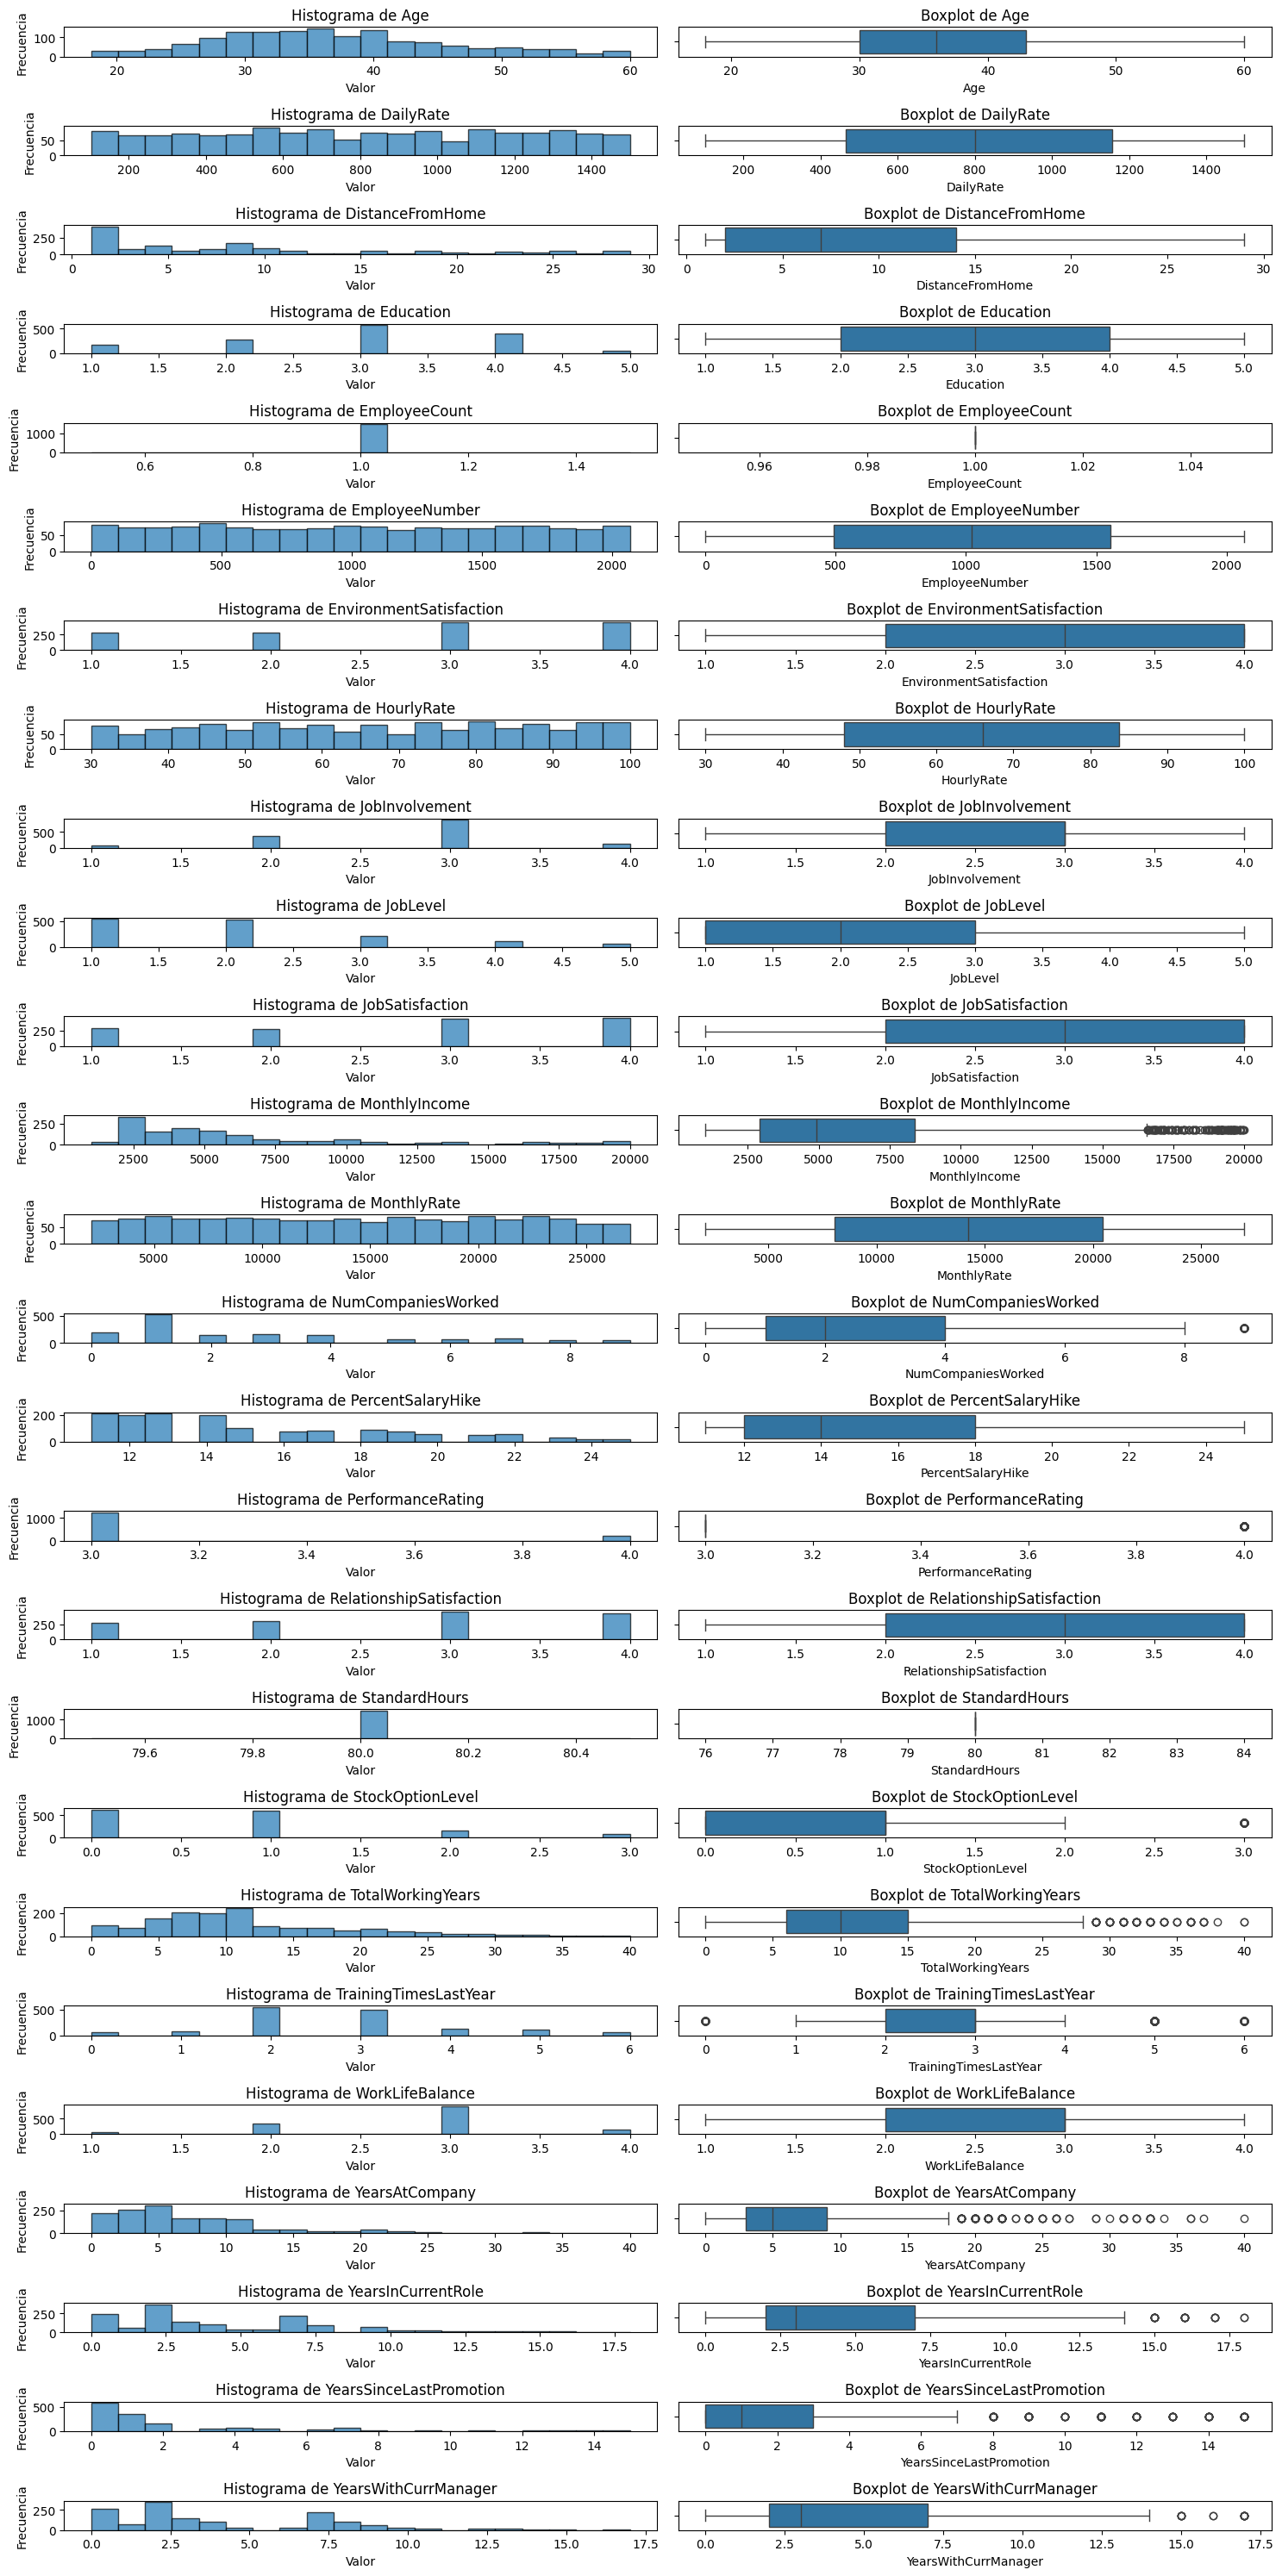

In [15]:
""" Outliers en salario y antigüedad, lo que puede indicar gran diferencia en la estructura organizacional."""

# Identificar columnas numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Configurar tamaño de las figuras
plt.figure(figsize=(15, 30))

# Graficar histogramas y boxplots para todas las variables numéricas
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, i * 2 - 1)  # Subplot para el histograma
    plt.hist(df[col], bins=20, alpha=0.7, edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel("Valor")
    plt.ylabel("Frecuencia")

    plt.subplot(len(numerical_columns), 2, i * 2)  # Subplot para el boxplot
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()

In [16]:
""" Hay más hombre que mujeres  """

# Identificar variables categóricas
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Generar tablas de frecuencia para variables categóricas
categorical_freq = {col: df[col].value_counts() for col in categorical_columns}

# Mostrar resultados
for col, freq in categorical_freq.items():
    print(f"\nFrecuencia de {col}:\n", freq)



Frecuencia de Attrition:
 Attrition
No     1233
Yes     237
Name: count, dtype: int64

Frecuencia de BusinessTravel:
 BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Frecuencia de Department:
 Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

Frecuencia de EducationField:
 EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

Frecuencia de Gender:
 Gender
Male      882
Female    588
Name: count, dtype: int64

Frecuencia de JobRole:
 JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Re

#  Identificación de valores atípicos


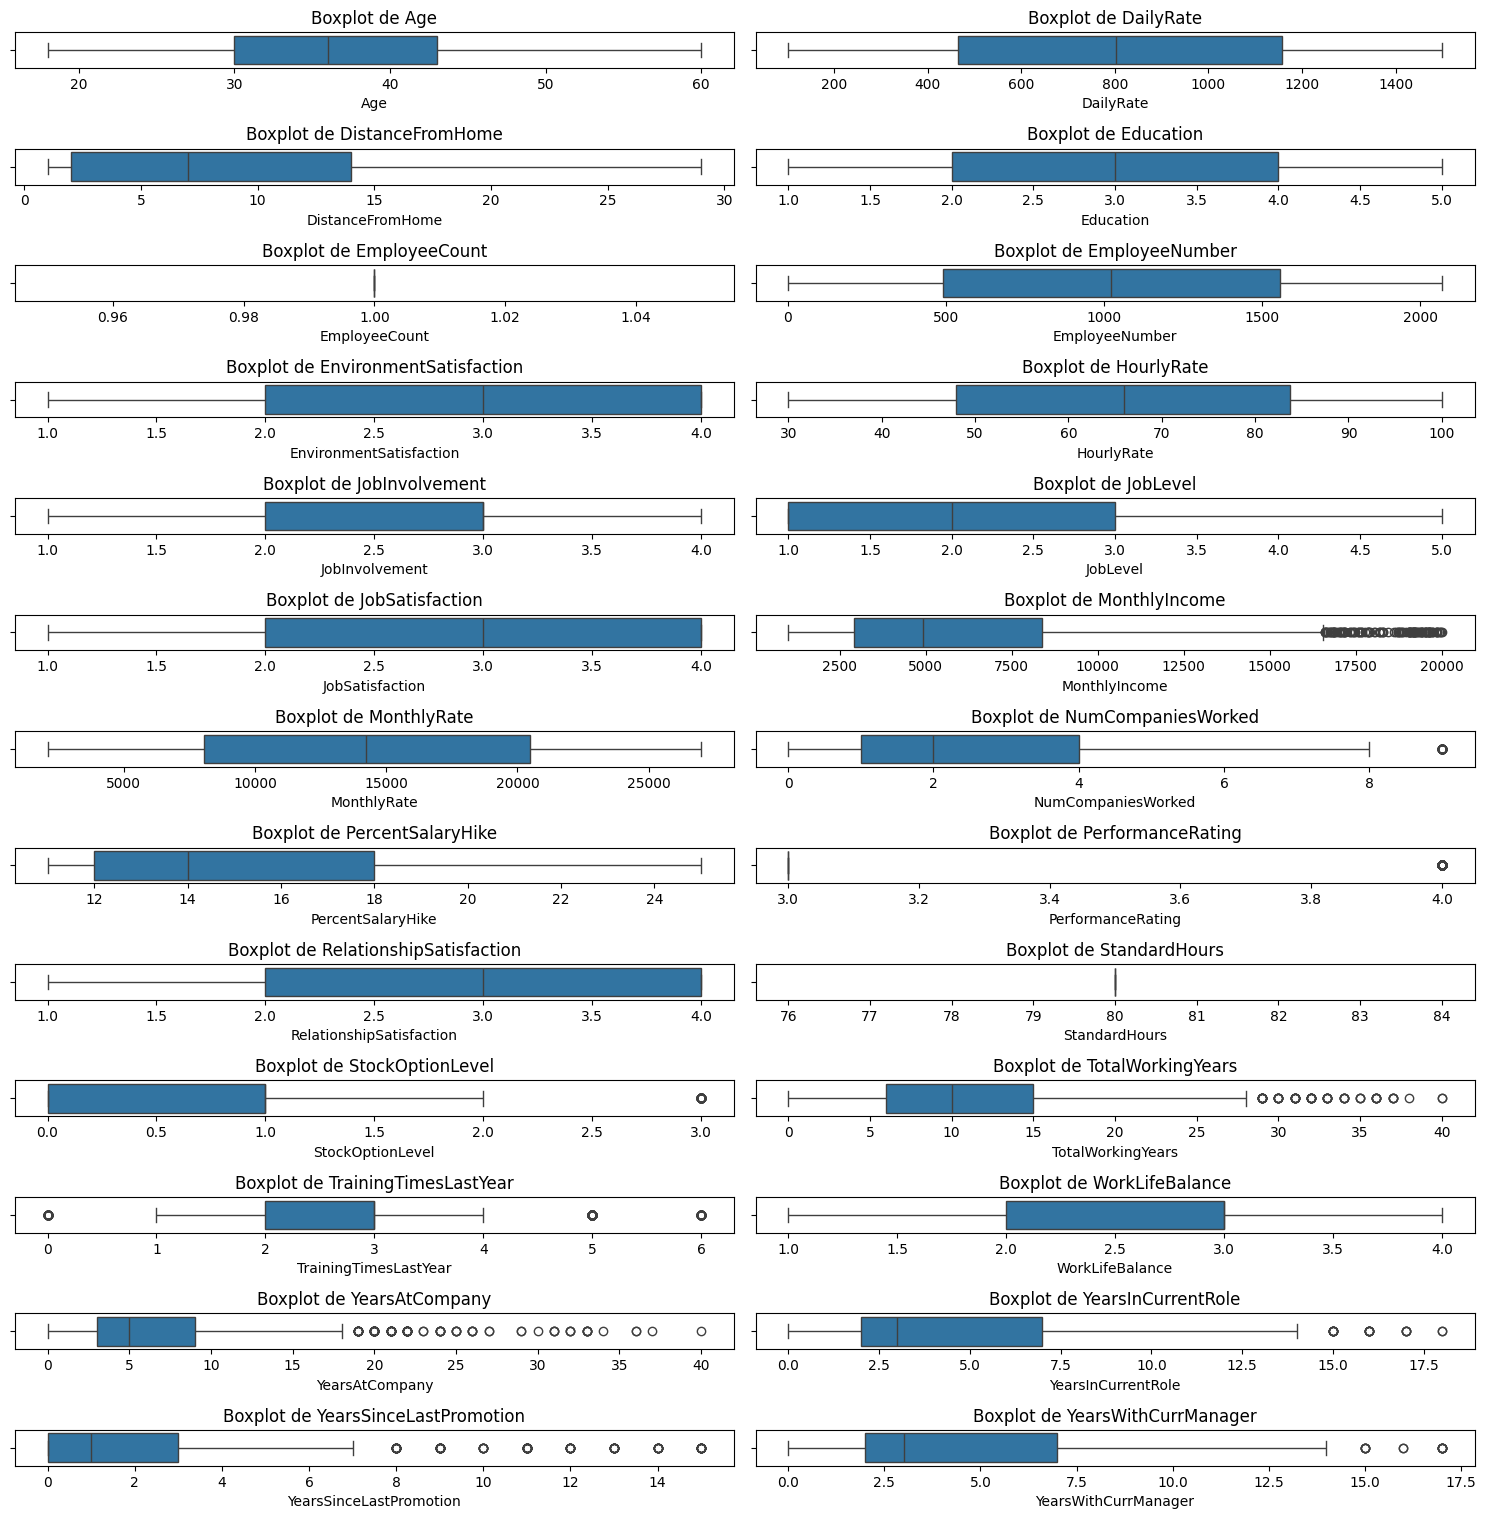

Valores atípicos detectados por Z-Score:
 Age                          0
DailyRate                    0
DistanceFromHome             0
Education                    0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobSatisfaction              0
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears           16
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany              25
YearsInCurrentRole          13
YearsSinceLastPromotion     42
YearsWithCurrManager        14
dtype: int64

Valores atípicos detectados por IQR:
 Age                           0
DailyRate                     0
DistanceFromHome              0
Educ

In [17]:
# Identificar columnas numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 📌 1. Boxplots para detectar valores atípicos
plt.figure(figsize=(15, 30))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

# 📌 2. Método Z-Score para detectar valores atípicos
z_scores = (df[numerical_columns] - df[numerical_columns].mean()) / df[numerical_columns].std()
outliers_zscore = (np.abs(z_scores) > 3).sum()

# 📌 3. Método IQR para detectar valores atípicos
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = ((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)).sum()

# 📌 Mostrar resultados de valores atípicos detectados
print("Valores atípicos detectados por Z-Score:\n", outliers_zscore)
print("\nValores atípicos detectados por IQR:\n", outliers_iqr)


✅ ¿Qué factores parecen influir en la rotación de empleados?
Las personas jóvens con menor sueldo es mayor la probabilidad a renunciar

✅ ¿Existen diferencias en la satisfacción laboral entre empleados que permanecen y los que se van?
Da la impresión que la satisfacción laboral influye en la desisión de dejar el empleo.

✅ ¿Cómo se distribuyen los salarios y la antigüedad en la empresa?
Hay pocos sueldos altos y se ve que la mayoria gana menos y han trabajado pocos años.